2024-10-04 15:47:33.328127: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


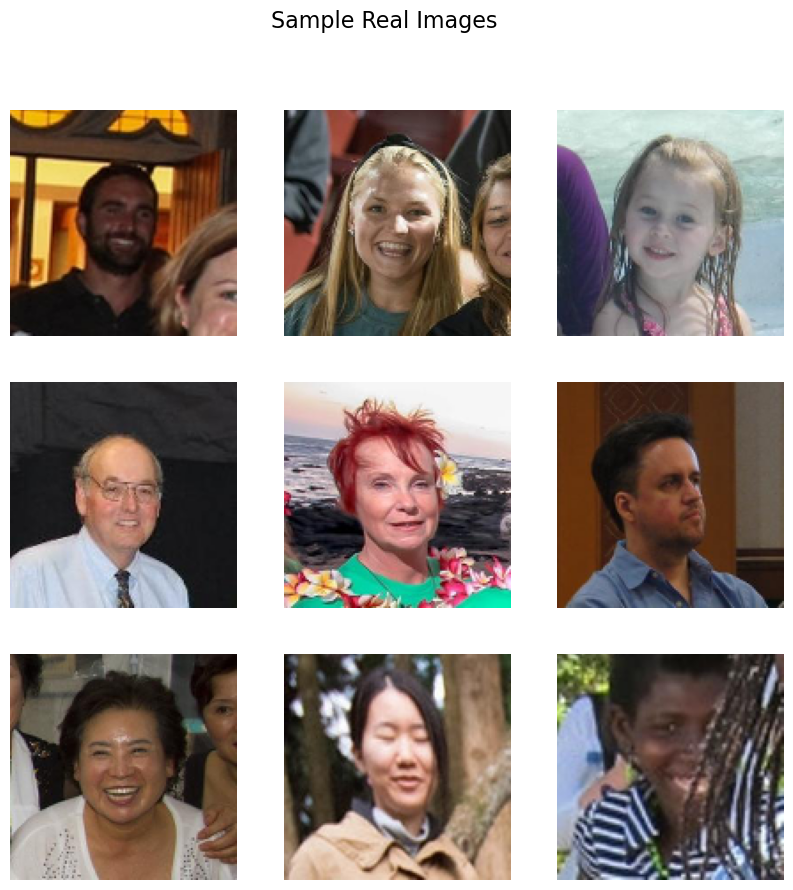

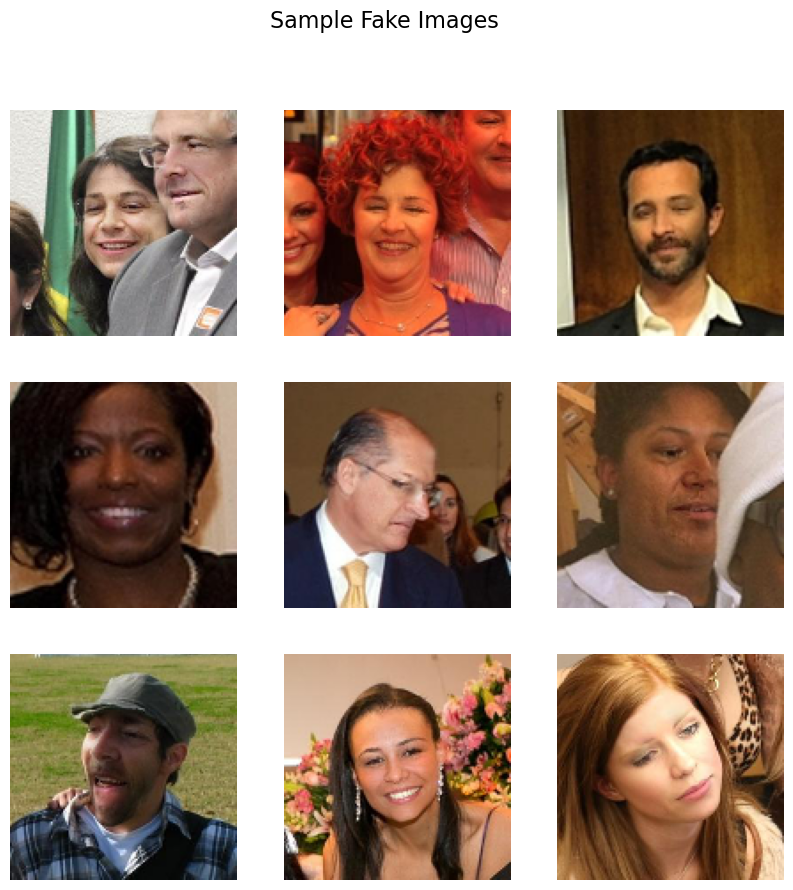

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

def plot_sample_images(images_list, title, rows=3, cols=3, target_size=(128, 128)):
    plt.figure(figsize=(10, 10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        img = load_img(images_list[i], target_size=target_size)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Assuming all images are in the same folder
image_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/NewData/newtrain'

# List all images
all_images = os.listdir(image_dir)

# Separate real and fake images based on filename patterns
real_images = [img for img in all_images if 'real' in img.lower()]
fake_images = [img for img in all_images if 'fake' in img.lower()]

# Plot sample images from both categories
plot_sample_images([os.path.join(image_dir, img) for img in real_images[:9]], title="Sample Real Images")
plot_sample_images([os.path.join(image_dir, img) for img in fake_images[:9]], title="Sample Fake Images")


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load dataset (assuming images are in folders 'real' and 'fake')
data_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/NewData'

# Data Preprocessing
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate Model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')


2024-09-16 21:00:14.361981: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1984 images belonging to 3 classes.
Found 496 images belonging to 3 classes.


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6248 - loss: -111550.4375 - val_accuracy: 0.6452 - val_loss: -7389979.0000
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6293 - loss: -40563348.0000 - val_accuracy: 0.6452 - val_loss: -557033344.0000
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6472 - loss: -1110282112.0000 - val_accuracy: 0.6452 - val_loss: -7203727360.0000
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6518 - loss: -10185634816.0000 - val_accuracy: 0.6452 - val_loss: -39504740352.0000
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6637 - loss: -42609934336.0000 - val_accuracy: 0.6452 - val_loss: -155931000832.0000
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6645 - loss: -140493062144.0000 - val_accuracy: 0.6452 - val_loss: -441833488384.0000
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6384 - loss: -479755010048.0000 - val_accuracy: 0.6452 - val_loss: -1046

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing
img_size = (224, 224)
batch_size = 32
data_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/NewData'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate Model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')


Found 1984 images belonging to 3 classes.
Found 496 images belonging to 3 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.6638 - loss: -0.7757 - val_accuracy: 0.6452 - val_loss: -4.0202
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6472 - loss: -6.2998 - val_accuracy: 0.6452 - val_loss: -12.6795
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6446 - loss: -19.2865 - val_accuracy: 0.6452 - val_loss: -28.6985
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6443 - loss: -32.2895 - val_accuracy: 0.6452 - val_loss: -49.7637
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6351 - loss: -51.1988 - val_accuracy: 0.6452 - val_loss: -77.5221
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6466 - loss: -82.7129 - val_accuracy: 0.6452 - val_loss: -112.3312
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6405 - loss: -131.665

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing
img_size = (299, 299)  # Xception requires input size of 299x299
batch_size = 32
data_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/NewData'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# XceptionNet Model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate Model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')


Found 1984 images belonging to 3 classes.
Found 496 images belonging to 3 classes.
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.6355 - loss: -4.1520 - val_accuracy: 0.6452 - val_loss: -23.0440
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.6482 - loss: -33.5757 - val_accuracy: 0.6452 - val_loss: -78.5540
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.6309 - loss: -104.8076 - val_accuracy: 0.6452 - val_loss: -169.9732
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.6599 - loss: -189.7167 - val_accuracy: 0.6452 - val_loss: -294.5910
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.6410 - loss: -317.4349 - val_accuracy: 0.6452 - val_loss: -457.7467
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 300s 5s/step - accuracy: 0.6395 - loss: -495.3201 - val_accuracy: 0.6452 - val_loss: -660.4779
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 331s 5s/step - accuracy: 0.6358 - loss: -794.4818 - val_accuracy: 0.6452 - val_loss: -

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing
img_size = (224, 224)
batch_size = 32
data_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/NewData'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Neural Network Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate Model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy}')


Found 1984 images belonging to 3 classes.
Found 496 images belonging to 3 classes.


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6372 - loss: -94012.3984 - val_accuracy: 0.6452 - val_loss: -5337542.0000
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6441 - loss: -28110428.0000 - val_accuracy: 0.6452 - val_loss: -366870624.0000
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6594 - loss: -665745472.0000 - val_accuracy: 0.6452 - val_loss: -4926650880.0000
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6443 - loss: -6501174784.0000 - val_accuracy: 0.6452 - val_loss: -29365561344.0000
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6553 - loss: -31723503616.0000 - val_accuracy: 0.6452 - val_loss: -108288925696.0000
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6319 - loss: -111506497536.0000 - val_accuracy: 0.6452 - val_loss: -315851800576.0000
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6483 - loss: -318179442688.0000 - val_accuracy: 0.6452 - val_loss: -7780695